### Business Understanding

##### Questions
1. Can we predict rental prices based on information from the listing?
2. Do higher priced listings tend to get better reviews?
3. Can we predict room type based on information from the listing?

### Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Use pandas built in read_csv function to import my dataset
listing = pd.read_csv('listings.csv')
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Used info method to allow me to understand the data types of each column, how many missing variables are in each 
# column, as well as find out which columns will be necessary to answer my questions.
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
# This gives me an understanding for the numeric data. It allows me to see how skewed some of the variables may be.
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [5]:
# Kept columns that would be necessary in answering questions
listing_new = listing[['id', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'guests_included', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']]

In [6]:
# Checked to see if there was a mistake in recording of the data between reviews_per_month and review_scores_rating
# I wanted to see if something did not line up because if there was an issue I would need to assess futher but since
# there are no issues nothing needs to be cleaned.
listing_new[(listing_new.reviews_per_month.isnull() == True) & (listing_new.review_scores_rating.isnull() == False)].head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


In [7]:
# Running the info method again allows me to see the data types and missing values for the variables I really care about.
listing_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   int64  
 1   property_type         3817 non-null   object 
 2   room_type             3818 non-null   object 
 3   accommodates          3818 non-null   int64  
 4   bathrooms             3802 non-null   float64
 5   bedrooms              3812 non-null   float64
 6   beds                  3817 non-null   float64
 7   price                 3818 non-null   object 
 8   security_deposit      1866 non-null   object 
 9   guests_included       3818 non-null   int64  
 10  minimum_nights        3818 non-null   int64  
 11  number_of_reviews     3818 non-null   int64  
 12  review_scores_rating  3171 non-null   float64
 13  reviews_per_month     3191 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 417.7+ KB


In [8]:
# Check the single missing property type.I do not currently have enough information to fill this value in so it must 
# eventually be dropped.
listing_new[(listing_new.property_type.isnull() == True)]

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
2184,3335,NaN,Entire home/apt,4,1.0,2.0,2.0,$120.00,$200.00,2,2,0,NaN,NaN


In [9]:
# Check the data with missing bathrooms.
listing_new[(listing_new.bathrooms.isnull() == True)].head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
1242,19611,Apartment,Entire home/apt,4,NaN,1.0,2.0,$107.00,NaN,1,2,26,87.0,0.37
1314,59827,Apartment,Entire home/apt,4,NaN,1.0,2.0,$135.00,NaN,1,2,13,87.0,0.21
1357,19623,Apartment,Entire home/apt,6,NaN,2.0,3.0,$186.00,NaN,1,2,38,89.0,0.54
1378,224763,Apartment,Entire home/apt,4,NaN,1.0,1.0,$149.00,$100.00,1,1,27,93.0,0.56
1961,609252,House,Private room,4,NaN,1.0,NaN,$280.00,NaN,1,1,0,NaN,NaN


In [10]:
# Check the data with missing bedrooms.
listing_new[(listing_new.bedrooms.isnull() == True)].head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
1429,1476298,Apartment,Entire home/apt,2,1.0,NaN,1.0,$80.00,NaN,2,1,170,94.0,5.82
1492,604600,Apartment,Entire home/apt,6,1.0,NaN,1.0,$200.00,$500.00,1,1,1,100.0,0.06
1493,1251763,Other,Entire home/apt,4,1.0,NaN,2.0,$132.00,NaN,1,1,1,100.0,0.08
1853,17951,Apartment,Entire home/apt,2,1.0,NaN,1.0,$95.00,$100.00,2,2,21,94.0,0.31
2619,948077,House,Entire home/apt,2,1.0,NaN,1.0,$99.00,$175.00,1,2,77,100.0,2.28


In [11]:
# Check the data with missing amount of beds.
listing_new[(listing_new.beds.isnull() == True)].head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
1961,609252,House,Private room,4,NaN,1.0,NaN,$280.00,NaN,1,1,0,NaN,NaN


In [12]:
# Check the data with missing security deposits. This makes sense because not every listing requires a security deposit.
listing_new[(listing_new.security_deposit.isnull() == True)].head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,NaN,2,1,207,95.0,4.07
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,NaN,1,1,0,NaN,NaN
5,5956968,House,Private room,2,1.0,1.0,1.0,$120.00,NaN,1,1,17,95.0,2.45
8,4948745,Apartment,Private room,2,1.0,1.0,1.0,$90.00,NaN,1,3,8,97.0,1.22
10,175576,House,Entire home/apt,2,1.0,1.0,1.0,$95.00,NaN,2,3,181,97.0,3.33


In [13]:
# Check the string format for the price column
listing_new.price.head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [14]:
# Check the string format for the security_deposit column
listing_new.security_deposit.value_counts().sort_index()

$1,000.00     29
$1,200.00      2
$1,500.00     11
$1,900.00      1
$100.00      348
$109.00        1
$115.00        1
$120.00        3
$125.00       12
$134.00        1
$140.00        1
$149.00        1
$150.00      191
$175.00        9
$180.00        1
$185.00        1
$195.00        1
$199.00        3
$2,000.00      4
$2,500.00      5
$200.00      283
$220.00        1
$225.00        1
$250.00      232
$295.00        3
$300.00      235
$350.00       79
$360.00        1
$375.00        1
$399.00        1
$400.00       49
$449.00        1
$450.00        5
$499.00        1
$5,000.00      1
$500.00      230
$550.00        2
$600.00        9
$650.00        1
$700.00        5
$750.00       14
$780.00        1
$800.00       10
$95.00        66
$99.00         5
$995.00        3
Name: security_deposit, dtype: int64

In [15]:
# Check to see if any out of the ordinary review_scores_rating exist.
listing_new.review_scores_rating.value_counts(dropna = False).sort_index(ascending = False)

100.0    781
99.0     146
98.0     292
97.0     266
96.0     278
95.0     260
94.0     198
93.0     184
92.0     105
91.0      97
90.0     138
89.0      53
88.0      47
87.0      55
86.0      17
85.0      24
84.0      23
83.0      13
82.0      10
81.0       3
80.0     111
79.0       2
78.0       4
77.0       4
76.0       5
75.0       3
74.0       2
73.0       7
72.0       4
71.0       3
70.0       8
68.0       2
67.0       2
66.0       2
65.0       1
64.0       1
60.0      12
57.0       1
55.0       1
53.0       1
40.0       4
20.0       1
NaN      647
Name: review_scores_rating, dtype: int64

In [16]:
# Check to see if any out of the ordinary reviews_per_month exist.
listing_new.reviews_per_month.value_counts(dropna = False).sort_index(ascending = False)

12.15      1
11.01      1
10.95      1
10.61      1
10.27      1
        ... 
0.05       4
0.04       7
0.03       4
0.02       1
NaN      627
Name: reviews_per_month, Length: 655, dtype: int64

In [17]:
# Checked to see if there was a mistake in recording of the data between number_of_reviews and review_scores_rating.
# I wanted to see if something did not line up because if there was an issue I would most likely delete the data point 
# because contains unverifiable data that does not line up.
listing_new[(listing_new.review_scores_rating.isnull() == True) & (listing_new.number_of_reviews.isnull() != 0)].head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


In [18]:
# Checked to see if there was a mistake in recording of the data between reviews_per_month and number_of_reviews.
listing_new[(listing_new.reviews_per_month.isnull() == True) & (listing_new.number_of_reviews.isnull() != 0)].head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


In [19]:
# Checked to see if there was any unexpected property_type. If you scroll up to when I ran the info method you will see 
# that this column is a string rather than a category. This needs to be addressed.
listing_new.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [20]:
# Checked to see if there was any unexpected room_type. If you scroll up to when I ran the info method you will see 
# that this column is a string rather than a category. This needs to be addressed.
listing_new.room_type.value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

### Prepare Data

#### Cleaning 

In [21]:
# Create a new dataframe to work with that will contain all of the cleaned information. We also drop the null values contained
# in the proprty_type column because we do not have the ability to find out this missing information. It is better we ust 
# delete the row. It also will not significantly impact our models because there is only 1 null value.
listing_cleaned = listing_new.dropna(subset = ['property_type'])
listing_cleaned.head()

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,NaN,2,1,207,95.0,4.07
1,953595,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,$100.00,1,2,43,96.0,1.48
2,3308979,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,"$1,000.00",10,4,20,97.0,1.15
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,NaN,1,1,0,NaN,NaN
4,278830,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,$700.00,6,1,38,92.0,0.89


In [22]:
# Stores the median amount of bathrooms for each sie that the listing can accommodate. I went with median because the median
# does not get affected by skew. I also felt like it would be the best estimator for those listings without bathrooms. I chose 
# to groupby accommodates because you would assume the more people the listing can accommodate the more potential bathrooms the 
# listing may have.
bathroom_null_replacement = listing_cleaned.groupby(['accommodates'])['bathrooms'].median()
bathroom_null_replacement

accommodates
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     2.0
7     2.0
8     2.0
9     2.5
10    2.5
11    4.0
12    3.0
14    3.0
15    3.5
16    3.5
Name: bathrooms, dtype: float64

In [23]:
# Used to see which rows contain null values for the bathrooms variable
print(listing_cleaned[listing_cleaned['bathrooms'].isnull() == True].index)

Int64Index([1242, 1314, 1357, 1378, 1961, 1975, 2048, 2096, 2306, 2408, 2432,
            2437, 2698, 2717, 2953, 3337],
           dtype='int64')


In [24]:
# Used the for loop to replace all of the missing bathroom values with the estimated values from above.
for i in listing_cleaned[listing_cleaned['bathrooms'].isnull() == True].index:
    listing_cleaned.loc[i, 'bathrooms'] = bathroom_null_replacement[listing_cleaned.loc[i, 'accommodates']]

C:\Users\jrsfe\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [25]:
# Checked to see if all null values in the bathrooms column were removed. Checked one of the original null values to see if it 
# contains the new and proper information now 
print(len(listing_cleaned[listing_cleaned['bathrooms'].isnull() == True]))
print(listing_cleaned.loc[1242, 'accommodates'], listing_cleaned.loc[1242, 'bathrooms'])

0
4 1.0


In [26]:
# Stores the median amount of bedrooms for each sie that the listing can accommodate. I went with median because the median
# does not get affected by skew. I also felt like it would be the best estimator for those listings without bedrooms. I chose 
# to groupby accommodates because you would assume the more people the listing can accommodate the more potential bedrooms the 
# listing may have.
bedroom_null_replacement = listing_cleaned.groupby(['accommodates'])['bedrooms'].median()
bedroom_null_replacement

accommodates
1     1.0
2     1.0
3     1.0
4     1.0
5     2.0
6     2.0
7     3.0
8     3.0
9     4.0
10    3.0
11    5.0
12    5.0
14    5.0
15    4.5
16    6.0
Name: bedrooms, dtype: float64

In [27]:
# Used to see which rows contain null values for the bedrooms variable
print(listing_cleaned[listing_cleaned['bedrooms'].isnull() == True].index)

Int64Index([1429, 1492, 1493, 1853, 2619, 2915], dtype='int64')


In [28]:
# Used the for loop to replace all of the missing bedroom values with the estimated values from above.
for i in listing_cleaned[listing_cleaned['bedrooms'].isnull() == True].index:
    listing_cleaned.loc[i, 'bedrooms'] = bedroom_null_replacement[listing_cleaned.loc[i, 'accommodates']]

C:\Users\jrsfe\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [29]:
# Checked to see if all null values in the bedrooms column were removed. Checked one of the original null values to see if it 
# contains the new and proper information now 
print(len(listing_cleaned[listing_cleaned['bedrooms'].isnull() == True]))
print(listing_cleaned.loc[1429, 'accommodates'], listing_cleaned.loc[1429, 'bedrooms'])

0
2 1.0


In [30]:
# Stores the median amount of beds for each sie that the listing can accommodate. I went with median because the median
# does not get affected by skew. I also felt like it would be the best estimator for those listings without beds. I chose 
# to groupby accommodates because you would assume the more people the listing can accommodate the more potential beds the 
# listing may have.
bed_null_replacement = listing_cleaned.groupby(['accommodates'])['beds'].median()
bed_null_replacement

accommodates
1      1.0
2      1.0
3      1.0
4      2.0
5      3.0
6      3.0
7      4.0
8      4.0
9      5.0
10     5.0
11     6.0
12     6.0
14     9.0
15     8.0
16    10.0
Name: beds, dtype: float64

In [31]:
# Used to see which rows contain null values for the beds variable
print(listing_cleaned[listing_cleaned['beds'].isnull() == True].index)

Int64Index([1961], dtype='int64')


In [32]:
# Used the for loop to replace all of the missing beds values with the estimated values from above.
for i in listing_cleaned[listing_cleaned['beds'].isnull() == True].index:
    listing_cleaned.loc[i, 'beds'] = bed_null_replacement[listing_cleaned.loc[i, 'accommodates']]

C:\Users\jrsfe\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [33]:
# Checked to see if all null values in the beds column were removed. Checked one of the original null values to see if it 
# contains the new and proper information now.
print(len(listing_cleaned[listing_cleaned['beds'].isnull() == True]))
print(listing_cleaned.loc[1961, 'accommodates'], listing_cleaned.loc[1961, 'beds'])

0
4 2.0


In [34]:
# Used the for loop to remove the $ and the , from each of the strings in the price column. Then I convert the string data type
# to a float data type. 
for i in listing_cleaned.index:
    listing_cleaned.loc[i, 'price'] = listing_cleaned.loc[i, 'price'].replace('$', '').replace(',', '')

listing_cleaned['price'] = listing_cleaned['price'].astype('float64')

C:\Users\jrsfe\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-34-8e4fbc8e9d3c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_cleaned['price'] = listing_cleaned['price'].astype('float64')


In [35]:
# Checked to make sure that the data type is float instead of a string.
listing_cleaned.price.dtype

dtype('float64')

In [36]:
# Used the for loop to remove the $ and the , from each of the strings in the security_deposit column that 
# contained a dollar value. For those with missing values I made them 0. This is because the listing does not 
# require a security deposit. Then I convert the string data type to a float data type. 
for i in listing_cleaned.index:
    if listing_cleaned['security_deposit'].isnull()[i] == True:
        listing_cleaned.loc[i, 'security_deposit'] = '0'
    else:
        listing_cleaned.loc[i, 'security_deposit'] = listing_cleaned.loc[i, 'security_deposit'].replace('$', '').replace(',', '')

listing_cleaned['security_deposit'] = listing_cleaned['security_deposit'].astype('float64')

<ipython-input-36-d7625e2ef087>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_cleaned['security_deposit'] = listing_cleaned['security_deposit'].astype('float64')


In [37]:
# Checked to make sure that the data type is float instead of a string.
listing_cleaned.security_deposit.dtype

dtype('float64')

In [38]:
# Used the for loop to change all of the null values in review_scores_rating to 0. 
# This is because nobody rated a place as a 0. A 0 now means that it wasn't rated rather than it meaning a very bad rating. This
# choice was made so that this variable can be used in modeling. I chose to change null values to 0 since 0 does not currently 
# exist. Also It seems more efficient to keep these values as integers and switching it to a category variable.
for i in listing_cleaned[listing_cleaned['review_scores_rating'].isnull() == True].index:
    listing_cleaned.loc[i, 'review_scores_rating'] = 0

C:\Users\jrsfe\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [39]:
# Changed the data type to an integer because no data was held in the deciaml places. All values held a 0 in the deicimal place
# already.
listing_cleaned['review_scores_rating'] = listing_cleaned['review_scores_rating'].astype('int64')

<ipython-input-39-fe4a0483f9cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_cleaned['review_scores_rating'] = listing_cleaned['review_scores_rating'].astype('int64')


In [40]:
# Checked to make sure that no null values exist in the review_scores_rating column.
listing_cleaned[listing_cleaned['review_scores_rating'].isnull() == True]

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


In [41]:
# Checked to make sure that no null values exist in the review_scores_rating column and that it is formatted 
# with the correct data type.
listing_cleaned.review_scores_rating.value_counts(dropna = False).sort_index(ascending = False)

100    781
99     146
98     292
97     266
96     278
95     260
94     198
93     184
92     105
91      97
90     138
89      53
88      47
87      55
86      17
85      24
84      23
83      13
82      10
81       3
80     111
79       2
78       4
77       4
76       5
75       3
74       2
73       7
72       4
71       3
70       8
68       2
67       2
66       2
65       1
64       1
60      12
57       1
55       1
53       1
40       4
20       1
0      646
Name: review_scores_rating, dtype: int64

In [42]:
# Used the for loop to change all of the null values in reviews_per_month to 0. 
# This is the listing never got rated. It would make sense to give t a value of 0 rather than deleting 
# all of these useful data points. 
for i in listing_cleaned[listing_cleaned['reviews_per_month'].isnull() == True].index:
    listing_cleaned.loc[i, 'reviews_per_month'] = 0

C:\Users\jrsfe\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [43]:
# Checked to make sure that no null values exist in the reviews_per_month column.
listing_cleaned[listing_cleaned['reviews_per_month'].isnull() == True]

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month


In [44]:
# Checked to make sure that no null values exist in the reviews_per_month column.
listing_cleaned.reviews_per_month.value_counts(dropna = False).sort_index(ascending = False)

12.15      1
11.01      1
10.95      1
10.61      1
10.27      1
        ... 
0.05       4
0.04       7
0.03       4
0.02       1
0.00     626
Name: reviews_per_month, Length: 655, dtype: int64

In [45]:
# For loop to change each of the two columns to the correct data type, category
for col in ['property_type', 'room_type']:
    listing_cleaned[col] = listing_cleaned[col].astype('category')

<ipython-input-45-f465c1a43139>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_cleaned[col] = listing_cleaned[col].astype('category')


In [46]:
# Created a separate dataframe to store the cleaned information but without changing the categories to dummy variables.
# The reason for this is because working with the category variable in one column is a lot easier for prediction purposes.
listing_cleaned_no_dummy = listing_cleaned

In [49]:
# For loop to create dummy variables for each of the two category variables. It will create the dummy 
# variables and remove the parent column from which it was created. I also dropped the first variable in each of the 
# category variables. This is because it allows for better analysis and interpretations when making a regression.

def create_dummy_variables(df, columns, drop_first = True):
    '''
    INPUT:
    df - Dataframe to add dummy variables to and remove category columns
    columns - List of columns that need dummy variables
    drop_first - Creates a dummy variable for k-1 variables if true
    
    OUTPUT:
    Dataframe with all provided columns removed and replaced with proper dummy variable columns
    '''
    
    for col in columns:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=drop_first)], axis=1)
    
    return df

In [50]:
listing_cleaned = create_dummy_variables(listing_cleaned, ['property_type', 'room_type'], drop_first = True)

In [51]:
# Checked to make sure that all dummy variables are created and look as they should
listing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3817 entries, 0 to 3817
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             3817 non-null   int64  
 1   accommodates                   3817 non-null   int64  
 2   bathrooms                      3817 non-null   float64
 3   bedrooms                       3817 non-null   float64
 4   beds                           3817 non-null   float64
 5   price                          3817 non-null   float64
 6   security_deposit               3817 non-null   float64
 7   guests_included                3817 non-null   int64  
 8   minimum_nights                 3817 non-null   int64  
 9   number_of_reviews              3817 non-null   int64  
 10  review_scores_rating           3817 non-null   int64  
 11  reviews_per_month              3817 non-null   float64
 12  property_type_Bed & Breakfast  3817 non-null   u

In [52]:
listing_cleaned.head()

,id,accommodates,bathrooms,bedrooms,beds,price,security_deposit,guests_included,minimum_nights,number_of_reviews,...,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room
0,241032,4,1.0,1.0,1.0,85.0,0.0,2,1,207,...,0,0,0,0,0,0,0,0,0,0
1,953595,4,1.0,1.0,1.0,150.0,100.0,1,2,43,...,0,0,0,0,0,0,0,0,0,0
2,3308979,11,4.5,5.0,7.0,975.0,1000.0,10,4,20,...,0,1,0,0,0,0,0,0,0,0
3,7421966,3,1.0,0.0,2.0,100.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,278830,6,2.0,3.0,3.0,450.0,700.0,6,1,38,...,0,1,0,0,0,0,0,0,0,0


### Data Modeling

#### Can we predict rental prices based on information from the listing?

In [53]:
import statsmodels.api as sm

X = listing_cleaned.drop(['id', 'price'], axis = 1)
y = listing_cleaned['price']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              780.0
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        13:12:38   Log-Likelihood:                         -21117.
No. Observations:                3817   AIC:                                  4.229e+04
Df Residuals:                    3790   BIC:                                  4.246e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [54]:
X = listing_cleaned.drop(['id', 'price', 'beds', 'minimum_nights', 'number_of_reviews'], axis = 1)
y = listing_cleaned['price']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              878.0
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        13:12:38   Log-Likelihood:                         -21117.
No. Observations:                3817   AIC:                                  4.228e+04
Df Residuals:                    3793   BIC:                                  4.243e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [55]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = listing_cleaned.drop(['id', 'price', 'beds', 'minimum_nights', 'number_of_reviews'], axis = 1)
y = listing_cleaned['price']

best_acc = 0
best_lm = None
best_pred = None

for _ in range(10000):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = .1)

    lm = LinearRegression(normalize = True)
    lm.fit(X_train, y_train)

    pred = lm.predict(X_test)

    acc = r2_score(y_test, pred)
    
    if acc > best_acc:
        best_acc = acc
        best_lm = lm
        best_pred = pred
        


print(best_acc)
print(best_lm.intercept_)
print(best_lm.coef_)

0.7088463458880376
38.53465890175711
[ 9.65319043e+00  3.03088244e+01  2.66732831e+01  3.80700768e-02
  2.10000724e+00 -3.41598014e-03 -3.95896326e+00  8.51003379e+00
  1.21933062e+02 -2.93046628e-01  6.14799180e+00  3.72813687e+01
 -6.10988508e+00  1.15401364e+01 -1.50622394e+02 -1.14775413e+01
  2.44782764e+01 -7.96552597e+00 -2.53428604e+01 -1.76133319e+01
  2.27691505e+01  5.72258136e+00 -3.47403478e+01 -6.53623509e+01]


### Evaluating the Results

I first wanted to see the strength of a liner regression model with all of the variables included (I kept the id excluded because it is a unique identifier for each listing and provides no useful information on predicting price). I then went through and looked for variables that are not statistically significant. This is because by including extra variables that provide no extra benefits, it only harms the model. 

I then ran another analysis, this time excluding all of the variables that are not significant. My adjusted R-squared variable had no significant change so I came to the conclusion that it would be best to keep those variables out of my model. 

Finally I split the data up into a training and testing set. I used the training set to train my model, while the testing set was used to see how well my model fits data it has never seen before. I simulated the train test split and linear regression 10,000 times and stored the model with the highest accuracy. This would allow me to produce the strongest possible model with the given data. The model that ended up being created had a accuracy of about 72%. This means my model is relatively good at predicting price.

### Data Modeling

#### Do higher priced listings tend to get better reviews?

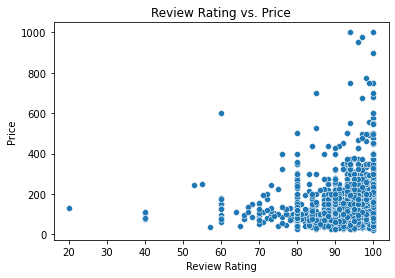

In [56]:
sb.scatterplot(data = listing_cleaned[listing_cleaned['review_scores_rating'] > 0], x = 'review_scores_rating', y = 'price')
plt.title('Review Rating vs. Price')
plt.xlabel('Review Rating')
plt.ylabel('Price');

### Evaluating the Results

I was curious to find out how the price of a listing and the rating it recieved were related. This scatter plot tells us a lot of information. 

First, we can see a steady uptrend between Review Rating and Price. This tells us that you may be able to charge slightly more for your listing if it has the good reviews to back it up. We can also learn that the places that are super expensive recieve the best ratings. This means as a person who would rent out an expensive listing, you will be very pleased with your stay.

Second, we can see the steady increase in variability in price as ratings increase. This means that the lower the rating the smaller the variability in the price. While as we get better ratings, our variability of price increases significantly. 

This information can help both the people making listings, as well as those looking for places to rent out. This helps those making listings because they relaize that they may be able to charge slightly higher and make slightly more money everytime they rent their place out if they have the ratings to support it. On top of that, it reveals how much the ratings affect the wiggle room in the price point. People will be willing to spend slightly more for a better rated place. On the consumer side of things, they can tend to see the positive correlation between spending more and a better place. These reveiws help them decide where they want to stay.

### Data Modeling

#### Can we predict room type based on information from the listing?

In [57]:
from sklearn import tree
from sklearn.metrics import accuracy_score

X = listing_cleaned_no_dummy[['accommodates', 'bathrooms', 'bedrooms', 'review_scores_rating', 'guests_included', 'price']]
y = listing_cleaned_no_dummy[['room_type']]

best_acc = 0
best_tree = None
best_pred = None
best_y_test = None

for _ in range(10000):
    X_train, X_test,y_train,y_test =  model_selection.train_test_split(X, y, test_size=0.10)

    clf = tree.DecisionTreeClassifier(min_samples_split = 120)
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)

    acc = accuracy_score(pred, y_test)
    
    if acc > best_acc:
        best_acc = acc
        best_tree = clf
        best_pred = pred
        best_y_test = y_test

print(best_acc)

best_y_test['predictions'] = best_pred

print(best_y_test)

0.9136125654450262
            room_type      predictions
1674  Entire home/apt  Entire home/apt
1870  Entire home/apt  Entire home/apt
1070  Entire home/apt  Entire home/apt
319   Entire home/apt  Entire home/apt
663   Entire home/apt  Entire home/apt
...               ...              ...
1478  Entire home/apt  Entire home/apt
2144  Entire home/apt     Private room
227   Entire home/apt  Entire home/apt
1241  Entire home/apt  Entire home/apt
2573  Entire home/apt  Entire home/apt

[382 rows x 2 columns]


<ipython-input-57-74407f045aae>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_y_test['predictions'] = best_pred


### Evaluating the Results

I was curious to see if I can accurately predict the room type of a listing given accommodates, bathrooms, bedrooms, review_scores_rating, guests_included, and price. I decided to go with a decision tree to split of the three categories of rooms (Entire home/apt, Private room, Shared room). I then used the variables that I believed to have the most impact on the type of room. I then ran the simulation of the decision tree 10,000 times and selected the tree that has the highest accuracy. By simulating the tree creating with a different training set every time allows for me to create the best and strongest model I could. 

The model that I ended up creating had an accuracy of approximately 92%. This means that it correctly guessed the room type 91% of the time. This means my model is very accurate when predicting the room type and my variables were very good in helping to predict the room type. 

This model can be very useful because if null values ever appear in the room_type column, this model can be used to predict what type of room the listing should have been. This model has the potential to expand on the businesses current available dataset by allowing previous data points that were once filtered out due to a lack of room_type, now have the ability to be included in analysis.